In [16]:
!pip install networkx
!pip install --config-settings="--global-option=build_ext" --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" pygraphviz



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [17]:
import os
import random
import heapq
from typing import Any
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.core.display import Image

basepath = os.path.join('..', 'images')
if not os.path.exists(basepath):
    os.makedirs(os.path.join(basepath), exist_ok=True)

# Aufgabe 02 - Spannbaum Kruskal

Suchen Sie einen minimalen Spannbaum mit dem Algorithmus von Kruskal und stellen Sie diesen dar.
    Welche Kosten hat dieser?


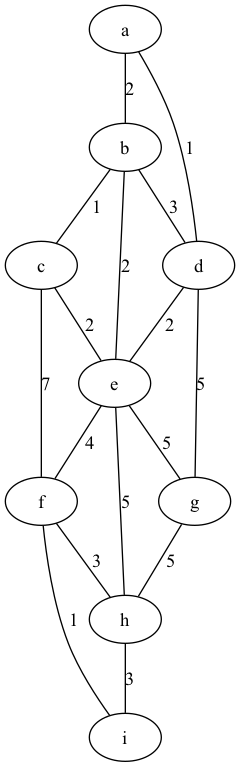

In [18]:
G = nx.Graph()
G.add_edge('a', 'b', weight=2)
G.add_edge('a', 'd', weight=1)
G.add_edge('b', 'c', weight=1)
G.add_edge('b', 'd', weight=3)
G.add_edge('b', 'e', weight=2)
G.add_edge('c', 'e', weight=2)
G.add_edge('c', 'f', weight=7)
G.add_edge('d', 'e', weight=2)
G.add_edge('d', 'g', weight=5)
G.add_edge('e', 'f', weight=4)
G.add_edge('e', 'g', weight=5)
G.add_edge('e', 'h', weight=5)
G.add_edge('f', 'h', weight=3)
G.add_edge('f', 'i', weight=1)
G.add_edge('g', 'h', weight=5)
G.add_edge('h', 'i', weight=3)

g = to_agraph(G)
g.layout(prog='dot')

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_file = os.path.join(basepath, f'a02a_graph.png')
g.draw(graph_file, prog='dot', format='png')

display(Image(graph_file))

[Kyle Kizirian](https://kylekizirian.github.io/prims-algorithm.html)

The cost of the MST is: 19


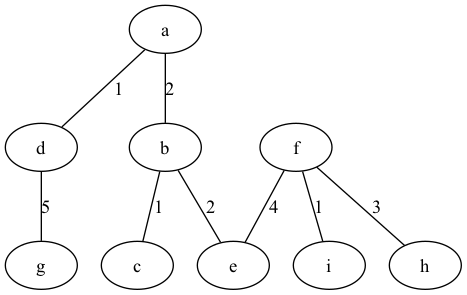

In [19]:
def kruskal(G: nx.Graph):
    mst = nx.Graph()
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]
    
    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    for node in G.nodes():
        parent[node] = node
        rank[node] = 0
    
    for edge in sorted_edges:
        weight, frm, to = edge[2]['weight'], edge[0], edge[1]
        if find(frm) != find(to):
            union(frm, to)
            mst.add_edge(frm, to, weight=weight)
    
    return mst

mst = kruskal(G)

# Calculate the cost of the MST
mst_cost = sum(data['weight'] for u, v, data in mst.edges(data=True))
print(f'The cost of the MST is: {mst_cost}')

g = to_agraph(mst)
g.layout(prog='dot')

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_file = os.path.join(basepath, 'a02a_mst.png')
g.draw(graph_file, prog='dot', format='png')
display(Image(graph_file))

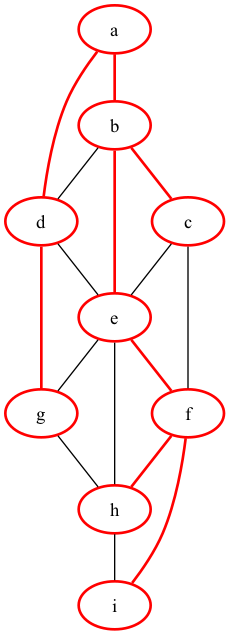

In [20]:
g = to_agraph(G)

# Mark the MST edges in red on the original graph
for edge in mst.edges(data=True):
    g.get_edge(edge[0], edge[1]).attr['color'] = 'red'
    g.get_edge(edge[0], edge[1]).attr['penwidth'] = 2.0

for node in mst.nodes():
    g.get_node(node).attr['color'] = 'red'
    g.get_node(node).attr['penwidth'] = 2.0

highlighted_graph_file = os.path.join(basepath, f'a02a_graph_highlighted.png')
g.draw(highlighted_graph_file, prog='dot', format='png')
display(Image(highlighted_graph_file))